In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_csv("train.csv")
data.head()
data.shape

(42000, 785)

In [19]:
label = data["label"]
features = data.drop("label", axis = 1)

In [20]:
scalar = StandardScaler()
sd_data = scalar.fit_transform(features) # standardizing the features
sd_data.shape

(42000, 784)

In [21]:
cov_data = np.matmul(sd_data.T, sd_data) # computing the covariance matrix
cov_data.shape

(784, 784)

In [22]:
from scipy.linalg import eigh
e_val, e_vector = eigh(cov_data, eigvals = (782, 783))
sd_data.shape

(42000, 784)

In [23]:
new_data = np.matmul(sd_data, e_vector)
sample_data = new_data
label = np.array(label)
label.reshape(42000, 1)
print(new_data.shape)
print(label.shape)

(42000, 2)
(42000,)


In [24]:
new_data = np.column_stack((new_data, label))
new_data = pd.DataFrame(data = new_data, columns = ("PC1", "PC2", "labels"))
new_data

,PC1,PC2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0
...,...,...,...
41995,-1.350366,13.678849,0.0
41996,-1.187360,-8.869582,1.0
41997,7.076277,0.495391,7.0
41998,-4.344513,2.307240,6.0


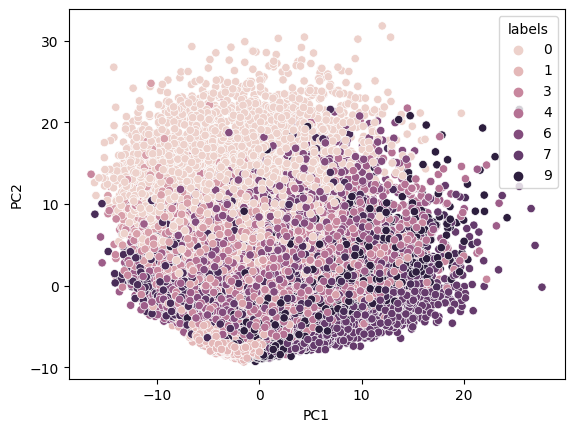

In [25]:
new_data['labels'] = new_data['labels'].astype('int')
sns.scatterplot(data = new_data, x = 'PC1', y = 'PC2', hue = 'labels')
plt.show()

In [26]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sd_data)
pca_data.shape

(42000, 2)

In [27]:
dt = np.column_stack((pca_data, label))

In [28]:
dt.shape

(42000, 3)

In [29]:

sample_data = pd.DataFrame(dt, columns = ('PC1', 'PC2', 'labels'))
sample_data['labels'] = sample_data['labels'].astype('int')
sample_data.shape

(42000, 3)

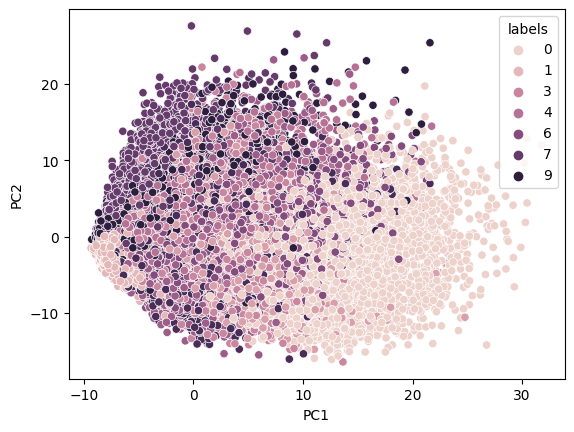

In [30]:
sns.scatterplot(data = sample_data, x = 'PC1', y = 'PC2', hue = 'labels')
plt.show()

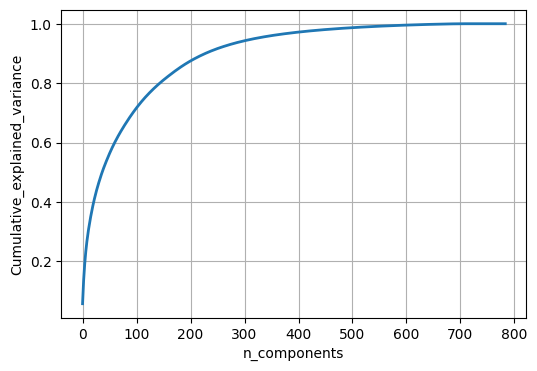

In [32]:
pca.n_components = 784
pca_data = pca.fit_transform(sd_data)

var_exp = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(var_exp)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

